In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
wdir = r'N:\Singlem\singlem19-4\october\04_origami_traces_NV\20191004_Origami_blinking'
fname = r'NF_PBS_561_10pct\timetraces.txt'
PBS = np.genfromtxt(os.path.join(wdir, fname), skip_header = 1, delimiter = '\t')

fname = r'NF_TxTq_561_10pct\timetraces.txt'
Trolox = np.genfromtxt(os.path.join(wdir, fname), skip_header = 1, delimiter = '\t')

fname = r'NF_TxTq+PCAPCD_561_10pct\timetraces.txt'
PPT = np.genfromtxt(os.path.join(wdir, fname), skip_header = 1, delimiter = '\t')

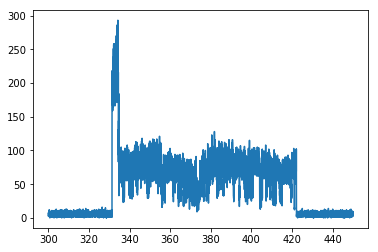

In [24]:
plt.plot(PPT[30000:45000,0]/1000,PPT[30000:45000,2])

In [46]:
##determine background levels
Gbg = np.mean(PPT[:700,1])
Rbg = np.mean(PPT[:700,2])
print('Gbg is %.1f, Rbg = %.1f' % (Gbg, Rbg))

PBS.shape[0]

Gbg is 4.3, Rbg = 5.1


46714

In [54]:
def calcBrightness(Arr, nmols, crosstalkGR =0.54, bg = None):
    if bg == None:
        bg = np.mean( Arr[:300,1:], axis = 0)
    res = np.sum(Arr[:,1:], axis = 0)- bg * np.array(PBS.shape[0])
    res[1] = res[1] -crosstalkGR * res[0]
    return res / nmols

In [69]:
PBSBrightness = calcBrightness(PBS, 10)
TroloxBrightness = calcBrightness(Trolox, 10)
PPTBrightness = calcBrightness(PPT, 13)
print ('Buffer is PBS, average photons of Alexa594 is %.0f, average photons of Atto647N is %.0f'
       % (PBSBrightness[0], PBSBrightness[1]))
print ('Buffer is Trolox, average photons of Alexa594 is %.0f, average photons of Atto647N is %.0f'
       % (TroloxBrightness[0], TroloxBrightness[1]))
print ('Buffer is PPT, average photons of Alexa594 is %.0f, average photons of Atto647N is %.0f'
       % (PPTBrightness[0], PPTBrightness[1]))

Buffer is PBS, average photons of Alexa594 is 78609, average photons of Atto647N is 139701
Buffer is Trolox, average photons of Alexa594 is 127023, average photons of Atto647N is 555798
Buffer is PPT, average photons of Alexa594 is 175355, average photons of Atto647N is 340762


In [58]:
def conditionalSum(Arr, minimum):
    Sum = 0
    for el in Arr:
        if(el>minimum):
            Sum+= el
    return Sum
print ('average photons before bleaching in %s is %i for n = %i' % ('PBS', conditionalSum(PBS, 150)/5., 5))
print ('average photons before bleaching in %s is %i for n = %i' % ('Trolox', conditionalSum(Trolox, 150)/9, 9))
print ('average photons before bleaching in %s is %i for n = %i' % ('PCAPCD', conditionalSum(PCAPCD, 150)/9, 9))
print ('average photons before bleaching in %s is %i for n = %i' % ('PPT', conditionalSum(PPT, 150)/12., 12))

average photons before bleaching in PBS is 78575 for n = 5
average photons before bleaching in Trolox is 176794 for n = 9
average photons before bleaching in PCAPCD is 12697 for n = 9
average photons before bleaching in PPT is 179430 for n = 12


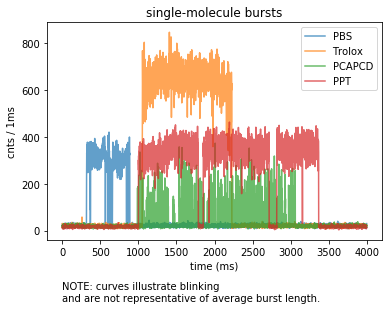

In [113]:
plt.plot(PBS[34500:38500], label = 'PBS', alpha = 0.7)
plt.plot(Trolox[9750:13750], label = 'Trolox', alpha = 0.7)
plt.plot(PCAPCD[79700:83700], label = 'PCAPCD', alpha = 0.7)
plt.plot(PPT[90000:94000], label = 'PPT', alpha = 0.7)
plt.legend()
plt.ylabel('cnts / 1ms')
plt.xlabel('time (ms)')
plt.title('single-molecule bursts')
plt.text(1,-300,'NOTE: curves illustrate blinking \nand are not representative of average burst length.')
plt.savefig('20191002Burst.png', bbox_inches = 'tight', dpi = 300)